## Train Banana Notebook

The essential steps to this are:

* Define Unity environment
* Get the default brain
* Import DQN Agent
* Run DQN training loop with default brain

*Note:* After you run the first cell, wait for a few seconds before running the second one.  It takes time for `unityagents` to set up.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from dqn_agent import Agent
import torch
from collections import deque
import matplotlib.pyplot as plt

In [2]:
env = UnityEnvironment(file_name="Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
agent = Agent(state_size=37, action_size=4, seed=0)  # Create DQN Agent

In [5]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, min_score=13.0):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # Reset the environment for the next episode
        state = env_info.vector_observations[0]  # Get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)  # Decide on the action
            env_info = env.step(action)[brain_name]   # Send the action to the environment

            # Obtain the reward, next state and whether we're done
            reward = env_info.rewards[0]
            next_state = env_info.vector_observations[0]
            done = env_info.local_done[0]

            # Perform the learning step
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break

        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\t# of timesteps needed: {}\tAverage Score: {:.2f}'.format(i_episode, t + 1, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\t# of timesteps needed: {}\tAverage Score: {:.2f}'.format(i_episode, t + 1, np.mean(scores_window)))
        if np.mean(scores_window) >= min_score:  # To deem this a success, we must achieve an average score of 13 in a 100 episode window
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    
    # If we dont converge, save it anyway
    if np.mean(scores_window) < min_score:
        print(f'Note: DQN Agent did not converge after {n_episodes} episodes')
        torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')

    return scores

In [6]:
scores = dqn()

Episode 100	# of timesteps needed: 300	Average Score: 0.08
Episode 200	# of timesteps needed: 300	Average Score: 2.04
Episode 300	# of timesteps needed: 300	Average Score: 5.41
Episode 400	# of timesteps needed: 300	Average Score: 8.56
Episode 500	# of timesteps needed: 300	Average Score: 10.38
Episode 600	# of timesteps needed: 300	Average Score: 12.93
Episode 602	# of timesteps needed: 300	Average Score: 13.04
Environment solved in 502 episodes!	Average Score: 13.04


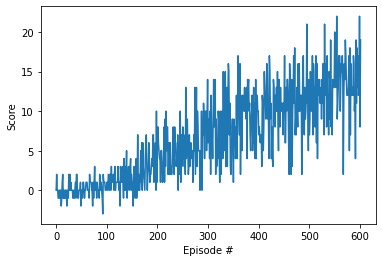

In [7]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()